In [232]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [233]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,plot,iplot,init_notebook_mode

In [234]:
init_notebook_mode(connected=True)

In [235]:
cf.go_offline()

In [236]:
world_cup = pd.read_csv('world_cup_data/WorldCups.csv')
player = pd.read_csv('world_cup_data/WorldCupPlayers.csv')
matches = pd.read_csv('world_cup_data/WorldCupMatches.csv')

In [237]:
world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [238]:
player.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [239]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [240]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# DATA CLEANING

In [241]:
matches.dropna(subset=['Year'], inplace=True)

In [242]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [243]:
matches['Home Team Name'].value_counts()

Brazil                      82
Italy                       57
Argentina                   54
Germany FR                  43
England                     35
                            ..
Iran                         1
IR Iran                      1
rn">United Arab Emirates     1
Canada                       1
Angola                       1
Name: Home Team Name, Length: 78, dtype: int64

In [244]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

rn">Republic of Ireland       5
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
rn">Trinidad and Tobago       1
rn">United Arab Emirates      1
Name: Home Team Name, dtype: int64

In [245]:
names.index

Index(['rn">Republic of Ireland', 'rn">Serbia and Montenegro',
       'rn">Bosnia and Herzegovina', 'rn">Trinidad and Tobago',
       'rn">United Arab Emirates'],
      dtype='object')

In [246]:
wrong_list = list(names.index)
wrong_list

['rn">Republic of Ireland',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina',
 'rn">Trinidad and Tobago',
 'rn">United Arab Emirates']

In [247]:
correct = [names.split('>')[1] for names in wrong_list]
correct

['Republic of Ireland',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina',
 'Trinidad and Tobago',
 'United Arab Emirates']

In [248]:
old = ['Germany FR','Maracan� - Est�dio Jornalista M�rio Filho','Estádio do Maracanã']
new = ['Germany','Maracanã Stadium','Maracanã Stadium']

In [249]:
wrong = wrong_list + old
correct = correct + new

In [250]:
correct,wrong

(['Republic of Ireland',
  'Serbia and Montenegro',
  'Bosnia and Herzegovina',
  'Trinidad and Tobago',
  'United Arab Emirates',
  'Germany',
  'Maracanã Stadium',
  'Maracanã Stadium'],
 ['rn">Republic of Ireland',
  'rn">Serbia and Montenegro',
  'rn">Bosnia and Herzegovina',
  'rn">Trinidad and Tobago',
  'rn">United Arab Emirates',
  'Germany FR',
  'Maracan� - Est�dio Jornalista M�rio Filho',
  'Estádio do Maracanã'])

In [251]:
for index, wr in enumerate(wrong):
    world_cup = world_cup.replace(wrong[index], correct[index])
for index, wr in enumerate(wrong):
    player = player.replace(wrong[index], correct[index])
for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])

# Most Number of world cum winnig Title

In [252]:
winner =world_cup['Winner'].value_counts()
winner

Brazil       5
Germany      4
Italy        4
Argentina    2
Uruguay      2
England      1
Spain        1
France       1
Name: Winner, dtype: int64

In [253]:
runners_up =world_cup['Runners-Up'].value_counts()
runners_up

Germany           4
Netherlands       3
Argentina         3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
France            1
Name: Runners-Up, dtype: int64

In [254]:
third =world_cup['Third'].value_counts()
third

Germany        4
Sweden         2
Poland         2
Brazil         2
France         2
Turkey         1
Italy          1
Portugal       1
Chile          1
Croatia        1
Netherlands    1
Austria        1
USA            1
Name: Third, dtype: int64

In [255]:
teams = pd.concat([winner,runners_up,third],axis=1)
teams.fillna(0,inplace=True)
teams = teams.astype(int)
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Germany,4,4,4
Italy,4,2,1
Argentina,2,3,0
Uruguay,2,0,0
England,1,0,0
Spain,1,0,0
France,1,1,2
Netherlands,0,3,1
Czechoslovakia,0,2,0


In [256]:
teams.iplot(kind = 'bar',xTitle = 'Team',yTitle = 'Count', title ='FIFA WORLD CUP WINNING')

# Number of golas per country

In [257]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [258]:
home = matches[['Home Team Name','Home Team Goals']].dropna()
away = matches[['Away Team Name','Away Team Goals']].dropna()

In [259]:
home

,Home Team Name,Home Team Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
847,Netherlands,0.0
848,Brazil,1.0
849,Netherlands,0.0
850,Brazil,0.0


In [260]:
away

,Away Team Name,Away Team Goals
0,Mexico,1.0
1,Belgium,0.0
2,Brazil,1.0
3,Peru,1.0
4,France,0.0
...,...,...
847,Costa Rica,0.0
848,Germany,7.0
849,Argentina,0.0
850,Netherlands,3.0


In [261]:
home.columns = ['Countries','Goals']
away.columns = home.columns

In [262]:
home

,Countries,Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
847,Netherlands,0.0
848,Brazil,1.0
849,Netherlands,0.0
850,Brazil,0.0


In [263]:
goals = home.append(away, ignore_index=True)

In [264]:
goals = goals.groupby('Countries').sum()
goals

,Goals
Countries,
Algeria,14.0
Angola,1.0
Argentina,133.0
Australia,11.0
Austria,43.0
...,...
United Arab Emirates,2.0
Uruguay,80.0
Wales,4.0


In [265]:
goals = goals.sort_values(by='Goals', ascending=False)
goals

,Goals
Countries,
Germany,235.0
Brazil,225.0
Argentina,133.0
Italy,128.0
France,108.0
...,...
Trinidad and Tobago,0.0
Canada,0.0
China PR,0.0


In [266]:
goals[:20].iplot(kind = 'bar',xTitle = 'Country Name', yTitle= 'Goals', title = 'Countries history most number of goals ')

# Atendance number of teams , goals and match per cup

In [267]:
world_cup['Attendance'] = world_cup['Attendance'].str.replace('.','')

In [268]:
world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


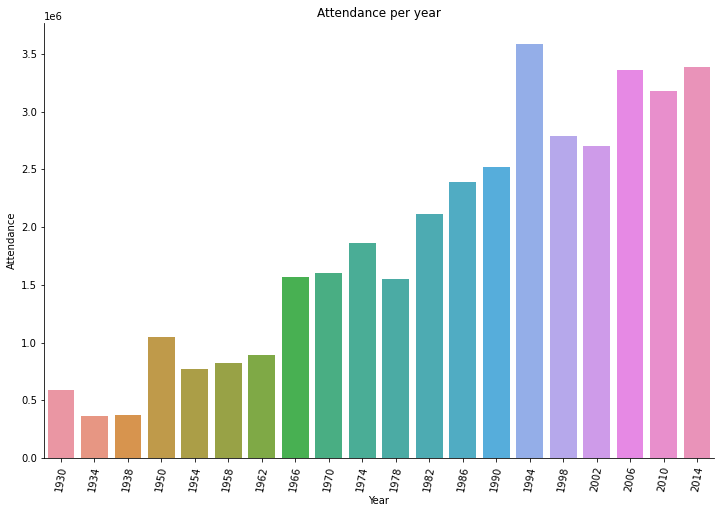

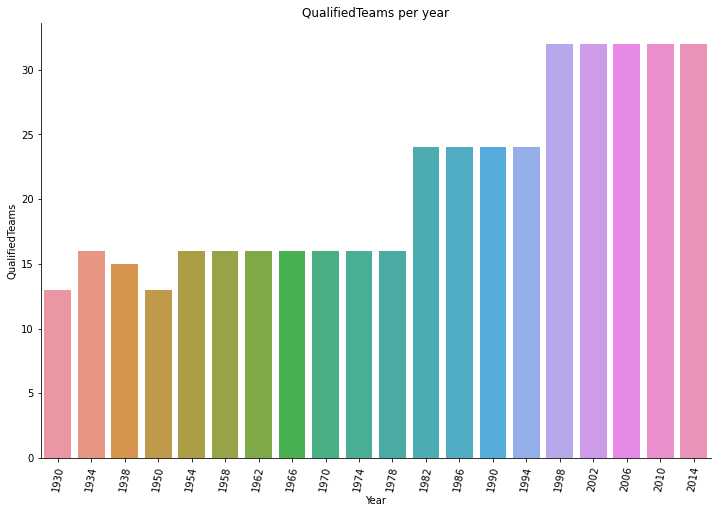

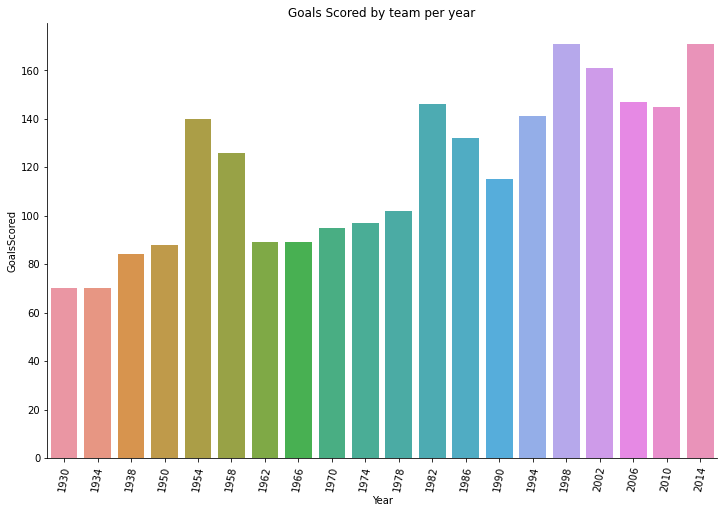

In [269]:
fig, ax = plt.subplots(figsize = (12,8))
sns.despine(right=True)
g = sns.barplot(x='Year',y = 'Attendance',data=world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Attendance per year')

#=================
fig, ax = plt.subplots(figsize = (12,8))
sns.despine(right=True)
g = sns.barplot(x='Year',y = 'QualifiedTeams',data=world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('QualifiedTeams per year')

#==================
fig, ax = plt.subplots(figsize = (12,8))
sns.despine(right=True)
g = sns.barplot(x='Year',y = 'GoalsScored',data=world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Goals Scored by team per year')

plt.show()

# Goals per team Per Word Cup

In [270]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [271]:
home = matches.groupby(['Year','Home Team Name'])['Home Team Goals'].sum()

In [272]:
home

Year    Home Team Name
1930.0  Argentina         16.0
        Brazil             4.0
        Chile              4.0
        France             4.0
        Paraguay           1.0
                          ... 
2014.0  Russia             1.0
        Spain              1.0
        Switzerland        4.0
        USA                2.0
        Uruguay            3.0
Name: Home Team Goals, Length: 366, dtype: float64

In [273]:
away = matches.groupby(['Year','Away Team Name'])['Away Team Goals'].sum()
away

Year    Away Team Name
1930.0  Argentina         2.0
        Belgium           0.0
        Bolivia           0.0
        Brazil            1.0
        Chile             1.0
                         ... 
2014.0  Russia            1.0
        Spain             3.0
        Switzerland       3.0
        USA               4.0
        Uruguay           1.0
Name: Away Team Goals, Length: 411, dtype: float64

In [274]:
goals = pd.concat([home, away],axis=1)
goals.fillna(0, inplace=True)
goals['Goals'] = goals['Home Team Goals'] +  goals['Away Team Goals']
goals = goals.drop(labels=['Home Team Goals','Away Team Goals'],axis=1)

In [275]:
goals

Goals
1930.0 Argentina     18.0
       Belgium        0.0
       Bolivia        0.0
       Brazil         5.0
       Chile          5.0
...                   ...
2014.0 Russia         2.0
       Spain          4.0
       Switzerland    7.0
       USA            6.0
       Uruguay        4.0

[427 rows x 1 columns]

In [276]:
goals = goals.reset_index()


In [277]:
goals.columns= ['Year','Country','Goals']
goals = goals.sort_values(by= ['Year','Goals'], ascending=[True, False])
goals

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0
...,...,...,...
416,2014.0,Japan,2.0
422,2014.0,Russia,2.0
401,2014.0,Cameroon,1.0
413,2014.0,Honduras,1.0


In [278]:
top5 = goals.groupby('Year').head(5)
top5.head(10)

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0
22,1934.0,Italy,12.0
20,1934.0,Germany,11.0
17,1934.0,Czechoslovakia,9.0
14,1934.0,Austria,7.0
21,1934.0,Hungary,5.0


In [279]:
import plotly.graph_objects as go


In [280]:
x, y = goals['Year'].values, goals['Goals'].values

In [281]:
data = []

In [282]:
for team in top5['Country'].drop_duplicates().values:
    year = top5[top5['Country']==team]['Year']
    goal = top5[top5['Country']==team]['Goals']
    
    data.append(go.Bar(x=year,y = goal, name=team))
layout = go.Layout(barmode ='stack',title= 'Top five team most goals',showlegend=False)
fig = go.Figure(data=data,layout=layout)
fig.show()
    

In [283]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [284]:
matches['Datetime'] = pd.to_datetime(matches['Datetime'])


In [285]:
matches['Datetime'] = matches['Datetime'].apply(lambda x: x.strftime('%d,%b,%Y'))

In [286]:
matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,"13,Jul,1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,"13,Jul,1930",Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


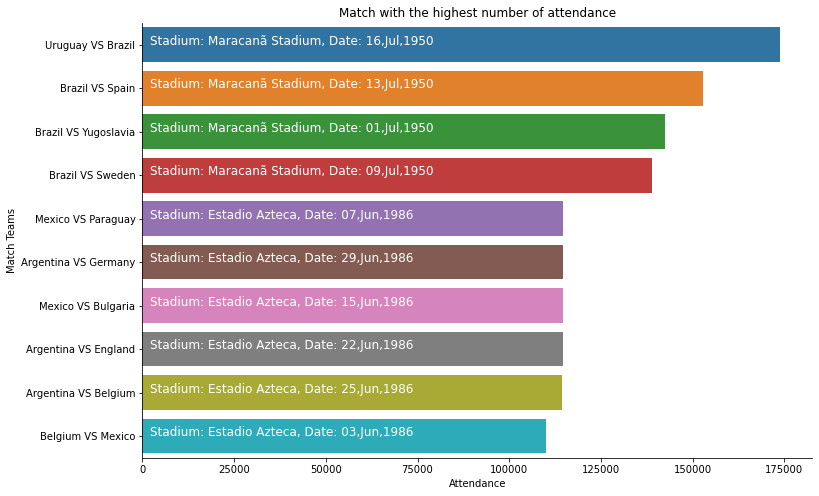

In [312]:
top10 = matches.sort_values(by='Attendance', ascending=False)[:10]
top10['vs'] = top10['Home Team Name'] + " VS " + top10['Away Team Name']
plt.figure(figsize=(12,8))
ax = sns.barplot(y =top10['vs'],x = top10['Attendance'])
sns.despine(right=True)
plt.xlabel('Attendance')
plt.ylabel('Match Teams')
plt.title('Match with the highest number of attendance')
for  i, s in enumerate('Stadium: '+ top10['Stadium'] + ", Date: "+ top10['Datetime']):
    ax.text(2000, i,s,fontsize=12,color='white')

plt.show()


# Stadium with Highest Average Attendance 

In [313]:
matches['Year'] = matches['Year'].astype(int)

In [316]:
std = matches.groupby(['Stadium','City'])['Attendance'].mean().reset_index().sort_values(by ='Attendance' ,ascending = False)

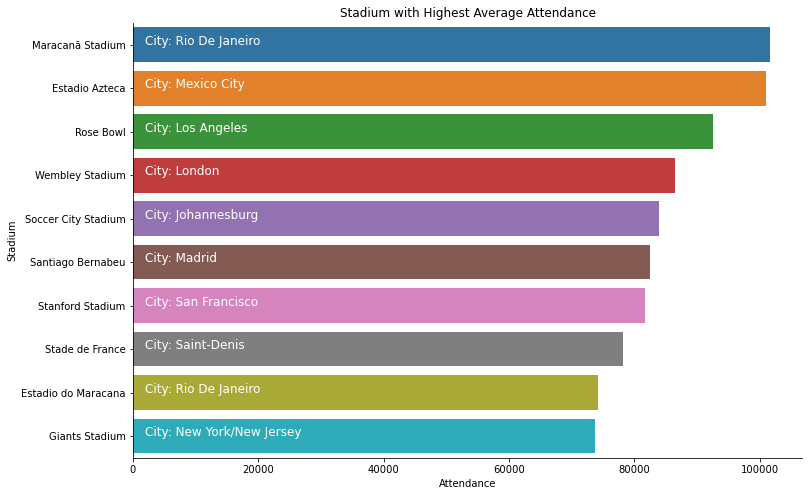

In [328]:
top10 = std[:10]
plt.figure(figsize=(12,8))
ax = sns.barplot( y=top10['Stadium'],x = top10['Attendance'])
sns.despine(right=True)

plt.xlabel('Attendance')
plt.ylabel('Stadium')
plt.title('Stadium with Highest Average Attendance')

for  i, s in enumerate('City: '+ top10['City'] ):
    ax.text(2000, i,s,fontsize=12,color='white')

plt.show()


In [331]:
matches['City'].value_counts()[:20].iplot(kind='bar')

# Matches Outcome by Home and Away Teams

In [351]:
def get_labels(matches):
    if matches['Home Team Goals'] > matches['Away Team Goals']:
         return 'Home Team win'
    if matches['Home Team Goals'] <  matches['Away Team Goals']:
        return 'Away Team win'
    else:
        return 'Draw'

In [352]:
matches['Outcomes'] = matches.apply(lambda x : get_labels(x),axis=1)

In [353]:
matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Outcome,Outcomes
0,1930,"13,Jul,1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Away Team Name,Home Team win
1,1930,"13,Jul,1930",Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Home Team Name,Home Team win
2,1930,"14,Jul,1930",Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Home Team Name,Home Team win
3,1930,"14,Jul,1930",Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Home Team Name,Home Team win
4,1930,"15,Jul,1930",Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Away Team Name,Home Team win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014,"05,Jul,2014",Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),...,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC,Home Team Name,Draw
848,2014,"08,Jul,2014",Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,...,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER,Away Team Name,Away Team win
849,2014,"09,Jul,2014",Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),...,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG,Home Team Name,Draw
850,2014,"12,Jul,2014",Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,...,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED,Away Team Name,Away Team win


In [354]:
plt.figure(figsize=(12,9))
mt = matches['Outcomes'].value_counts()
mt

Home Team win    488
Draw             190
Away Team win    174
Name: Outcomes, dtype: int64

<Figure size 864x648 with 0 Axes>

Text(0.5, 1.0, 'Matche Outcome by Home and Away Teams')

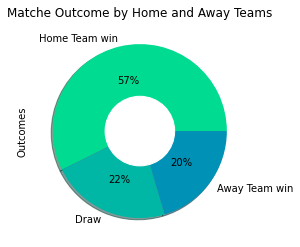

In [374]:
mt.plot.pie(autopct = '%1.0f%%',colors=sns.color_palette('winter_r'),shadow =True)
c = plt.Circle((0,0),0.4,color='white')
plt.gca().add_artist(c)
plt.title('Matche Outcome by Home and Away Teams')